In [1]:
import sys
sys.path.insert(1, '../../..')

In [2]:
import numpy as np
import pandas as pd
from medicine.models.compound import Compound
from medicine.models.medicine import Medicine
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
compound_list = []
for compound in Compound.query.all():
    medicine_list = [medicine.name for medicine in compound.medicine]
    compound_list.append(medicine_list)

F:\Python\anaconda3\lib\site-packages\sqlalchemy\engine\default.py:470: Warning: (1366, "Incorrect string value: '\\xA5x\\xA5_\\xBC\\xD0...' for column 'VARIABLE_VALUE' at row 480")
  cursor.execute(statement, parameters)


In [4]:
df = pd.DataFrame({'medicines':compound_list}, index=[c.name for c in Compound.query.all()])
df.head(10)

,medicines
滅瘢痕,[夏冰]
闢禳時疫,[半天河]
身體白駁,[半天河]
目不得瞑,"[流水, 半夏]"
汗後奔豚,"[流水, 甘草, 茯苓]"
服藥過劑煩悶,[流水]
九竅出血,"[井華水, 丹砂]"
衄血不止,[井華水]
衄血不止,[井華水]
衄血不止,[井華水]


In [5]:
te = TransactionEncoder()
te_ary = te.fit(compound_list).transform(compound_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head(10)

,丁香,三七,三歲陳棗核中仁,不灰木,丹參,丹砂,丹黍米,乳汁,乳腐,乾薑,...,鼠李,鼬鼠,齑水,齒,龍珠,龍眼,龍腦香,龍膽,龍舌草,龍葵
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

In [7]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [8]:
Z = linkage(df, 'ward')

In [9]:
dist = pdist(df)

In [10]:
c, coph_dists = cophenet(Z, dist)

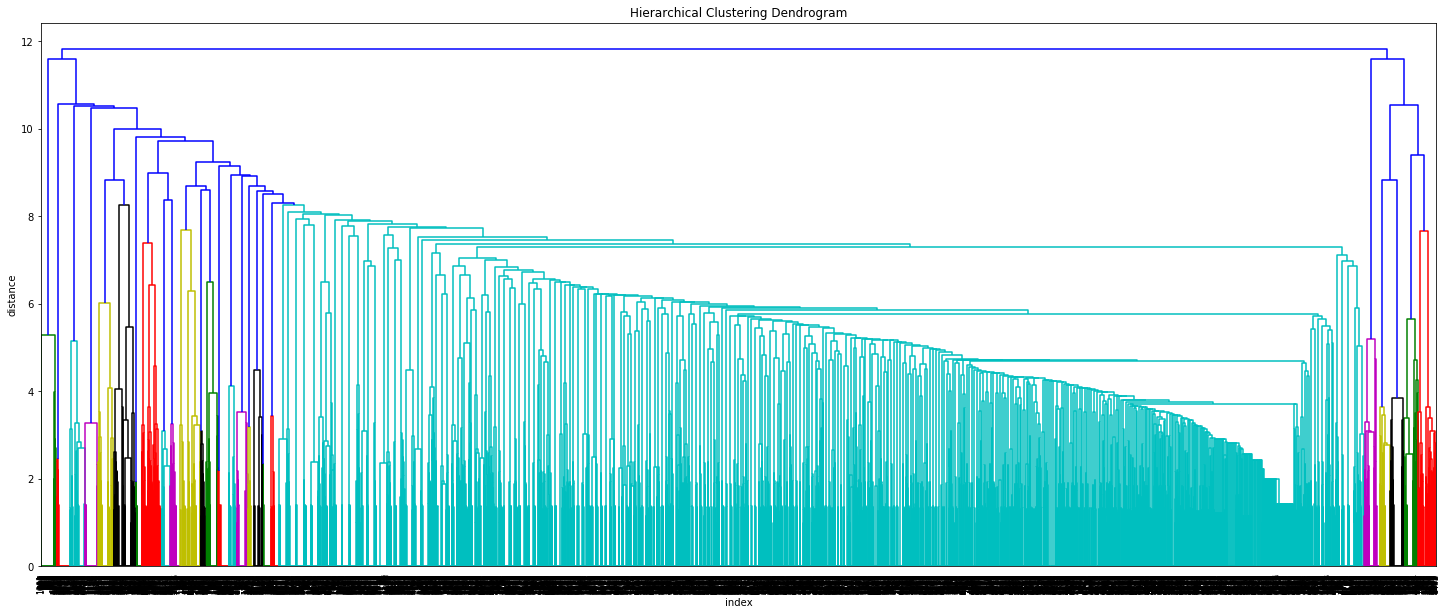

In [13]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [12]:
Z

array([[1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 8.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [9.00000000e+00, 5.81600000e+03, 0.00000000e+00, 3.00000000e+00],
       ...,
       [1.14780000e+04, 1.16250000e+04, 1.15895269e+01, 5.51600000e+03],
       [1.14720000e+04, 1.16240000e+04, 1.15941098e+01, 2.99000000e+02],
       [1.16260000e+04, 1.16270000e+04, 1.18358313e+01, 5.81500000e+03]])